# Exploração de dados

## Importar dados de reclamação

In [1]:
import pandas as pd
import numpy as np

In [2]:
caminho = '/content/drive/MyDrive/0. STF/01_Projetos/2023/07.05_reclamacoes/reclamacao_fev_abr.gzip'
df = pd.read_parquet(caminho)

In [3]:
df.head()

,Link Processo,Número,Relator Atual,Segredo Justiça,Situação Processo,Alertas,Data da Autuação,Partes - Polos Ativos,Partes - Polos Passivos,Indicador Usurpação,Usurpação de Competência,Repercussão Geral,Controle Concentrado,Sumula,Controle Difuso,Outros
0,Rcl-57762,57762.0,MIN. CÁRMEN LÚCIA,Não,Distribuido,Medida Liminar Criminal,2023-02-01,JEFERSON LUIZ DE SANTANA,JUIZ DE DIREITO DA VARA ÚNICA DA COMARCA DE CA...,Violação,None,TEMA 608,None,None,None,None
1,Rcl-57763,57763.0,MIN. NUNES MARQUES,Não,Distribuido,Medida Liminar,2023-02-01,JOSE FERREIRA CUNHA,TRIBUNAL DE JUSTIÇA DO ESTADO DE SÃO PAULO,Usurpação,None,None,None,None,None,None
2,Rcl-57764,57764.0,MIN. LUIZ FUX,Não,Distribuido,None,2023-02-01,ESTADO DE MATO GROSSO DO SUL,TRIBUNAL DE JUSTICA DO ESTADO DE MATO GROSSO D...,Violação,None,TEMA 793,None,None,None,None
3,Rcl-57765,57765.0,MIN. LUIZ FUX,Não,Distribuido,None,2023-02-01,ESTADO DE MATO GROSSO DO SUL,TRIBUNAL DE JUSTICA DO ESTADO DE MATO GROSSO D...,Violação,None,TEMA 793,None,None,None,None
4,Rcl-57766,57766.0,MIN. EDSON FACHIN,Não,Distribuido,None,2023-02-01,VERA LUCIA GONCALVES DOS SANTOS,QUARTA TURMA RECURSAL DOS JUIZADOS ESPECIAIS D...,Violação,None,None,None,None,MI 7.044,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 0 to 621
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Link Processo             1712 non-null   object        
 1   Número                    1712 non-null   float64       
 2   Relator Atual             1705 non-null   object        
 3   Segredo Justiça           1711 non-null   object        
 4   Situação Processo         1712 non-null   object        
 5   Alertas                   1584 non-null   object        
 6   Data da Autuação          1712 non-null   datetime64[ns]
 7   Partes - Polos Ativos     1678 non-null   object        
 8   Partes - Polos Passivos   1677 non-null   object        
 9   Indicador Usurpação       1501 non-null   object        
 10  Usurpação de Competência  527 non-null    object        
 11  Repercussão Geral         866 non-null    object        
 12  Controle Concentrado 

In [5]:
# Quantidade de dados nulos
pd.isnull(df['Indicador Usurpação']).value_counts()

False    1501
True      212
Name: Indicador Usurpação, dtype: int64

## Importar dados de decisão

In [6]:
# importa dados de decisão
caminho = '/content/drive/MyDrive/0. STF/01_Projetos/2023/07.05_reclamacoes/decisoes_rcl_2022_hoje.xlsx'
df_decisao = pd.read_excel(caminho)

In [7]:
df_decisao.head()

,Classe,Número,Link,Relator,Data de autuação,Indicador virtual,Data da decisão,Ano da decisão,Subgrupo andamento decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Indicador eletrônico,Data baixa processo,Ramo direito,Assuntos do processo,Indicador de tramitação
0,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,VIRTUAL,2021-05-12,2021,Decisão Final,Procedente,"Decisão: A Turma, por unanimidade, julgou proc...",COLEGIADA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não
1,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,VIRTUAL,2021-12-06,2021,Decisão em recurso interno,Embargos rejeitados,"Decisão: A Turma, por unanimidade, rejeitou os...",COLEGIADA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não
2,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,MONOCRÁTICA,2023-02-01,2023,Decisão Final,Não conhecido(s),"(Ref. Petição 99197/2022) Inicialmente, destac...",MONOCRÁTICA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não
3,Rcl,2566,https://portal.stf.jus.br/processos/detalhe.as...,MIN. NUNES MARQUES,2004-02-13,MONOCRÁTICA,2021-09-09,2021,Decisão Final,Negado seguimento,"Ref. petição n.º 121.374/2007: ""Ex positis, po...",MONOCRÁTICA,Eletrônico,2021-10-26 00:00:00,-,-,Não
4,Rcl,2566,https://portal.stf.jus.br/processos/detalhe.as...,MIN. NUNES MARQUES,2004-02-13,MONOCRÁTICA,2021-09-30,2021,Decisão Final,Negado seguimento,-,MONOCRÁTICA,Eletrônico,2021-10-26 00:00:00,-,-,Não


In [8]:
df_decisao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25474 entries, 0 to 25473
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Classe                      25474 non-null  object        
 1   Número                      25474 non-null  int64         
 2   Link                        25474 non-null  object        
 3   Relator                     25474 non-null  object        
 4   Data de autuação            25474 non-null  datetime64[ns]
 5   Indicador virtual           25474 non-null  object        
 6   Data da decisão             25474 non-null  datetime64[ns]
 7   Ano da decisão              25474 non-null  int64         
 8   Subgrupo andamento decisão  25474 non-null  object        
 9   Andamento decisão           25474 non-null  object        
 10  Observação do andamento     25474 non-null  object        
 11  Indicador Colegiada         25474 non-null  object    

In [9]:
# Create new variable
df_decisao['Link Processo'] = df_decisao['Classe'] + '-' + df_decisao['Número'].astype(str)

## Analise dos processo

In [10]:
# Filter process with more than 2 decisions

filtered_decision = df_decisao[df_decisao['Link Processo'].isin(df['Link Processo'])]
decision_rcl = pd.DataFrame(filtered_decision['Link Processo'].value_counts())

decision_rcl[decision_rcl['Link Processo'] > 1]

,Link Processo
Rcl-57957,6
Rcl-58301,6
Rcl-58292,5
Rcl-58587,5
Rcl-57762,4
...,...
Rcl-57832,2
Rcl-57829,2
Rcl-57964,2
Rcl-57836,2


In [11]:
# size of database
filtered_decision.shape

(1920, 18)

In [12]:
condition_filter = decision_rcl[decision_rcl['Link Processo'] > 1]
condition_filter.reset_index(inplace = True, names = 'processo')
condition_filter

,processo,Link Processo
0,Rcl-57957,6
1,Rcl-58301,6
2,Rcl-58292,5
3,Rcl-58587,5
4,Rcl-57762,4
...,...,...
333,Rcl-57832,2
334,Rcl-57829,2
335,Rcl-57964,2
336,Rcl-57836,2


In [13]:
# Quantidade de linhas que se espera
condition_filter['Link Processo'].sum()

749

In [14]:
# Listar os andamentos
andamentos = df_decisao['Andamento decisão'].value_counts()
andamentos = pd.DataFrame(andamentos).reset_index().iloc[:,[0]]
andamentos.rename(columns = {'index' : 'andamento'}, inplace = True)

andamentos

,andamento
0,Negado seguimento
1,Procedente
2,Agravo regimental não provido
3,Liminar deferida
4,Embargos rejeitados
5,Prejudicado
6,Procedente em parte
7,Extinto o processo
8,Improcedente
9,Homologada a desistência


In [15]:
lista_provimento = [
  'Agravo provido e desde logo provido o RE',
  'Agravo provido e desde logo provido parcialmente o RE',
  'Conhecido e provido',
  'Conhecido e provido em parte',
  'Conhecido em parte e nessa parte provido',
  'Conhecido em parte e nessa parte parcialmente provido',
  'Procedente',
  'Procedente em parte',
  'Provido',
  'Provido em parte',
  'Concedida a ordem de ofício'
]

df_provimento = pd.DataFrame(lista_provimento, columns =  ['Andamento decisão'])
df_provimento['de_para'] = 'provido'
df_provimento

,Andamento decisão,de_para
0,Agravo provido e desde logo provido o RE,provido
1,Agravo provido e desde logo provido parcialmen...,provido
2,Conhecido e provido,provido
3,Conhecido e provido em parte,provido
4,Conhecido em parte e nessa parte provido,provido
5,Conhecido em parte e nessa parte parcialmente ...,provido
6,Procedente,provido
7,Procedente em parte,provido
8,Provido,provido
9,Provido em parte,provido


In [16]:
# Incluindo DEPARA dos processos
df_decisao= df_decisao.merge(df_provimento, on = 'Andamento decisão', how = 'left')
df_decisao['de_para'].fillna('não provido', inplace = True)
df_decisao.head()

,Classe,Número,Link,Relator,Data de autuação,Indicador virtual,Data da decisão,Ano da decisão,Subgrupo andamento decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Indicador eletrônico,Data baixa processo,Ramo direito,Assuntos do processo,Indicador de tramitação,Link Processo,de_para
0,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,VIRTUAL,2021-05-12,2021,Decisão Final,Procedente,"Decisão: A Turma, por unanimidade, julgou proc...",COLEGIADA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não,Rcl-2021,provido
1,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,VIRTUAL,2021-12-06,2021,Decisão em recurso interno,Embargos rejeitados,"Decisão: A Turma, por unanimidade, rejeitou os...",COLEGIADA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não,Rcl-2021,não provido
2,Rcl,2021,https://portal.stf.jus.br/processos/detalhe.as...,MIN. EDSON FACHIN,2002-01-08,MONOCRÁTICA,2023-02-01,2023,Decisão Final,Não conhecido(s),"(Ref. Petição 99197/2022) Inicialmente, destac...",MONOCRÁTICA,Eletrônico,2022-02-15 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não,Rcl-2021,não provido
3,Rcl,2566,https://portal.stf.jus.br/processos/detalhe.as...,MIN. NUNES MARQUES,2004-02-13,MONOCRÁTICA,2021-09-09,2021,Decisão Final,Negado seguimento,"Ref. petição n.º 121.374/2007: ""Ex positis, po...",MONOCRÁTICA,Eletrônico,2021-10-26 00:00:00,-,-,Não,Rcl-2566,não provido
4,Rcl,2566,https://portal.stf.jus.br/processos/detalhe.as...,MIN. NUNES MARQUES,2004-02-13,MONOCRÁTICA,2021-09-30,2021,Decisão Final,Negado seguimento,-,MONOCRÁTICA,Eletrônico,2021-10-26 00:00:00,-,-,Não,Rcl-2566,não provido


In [17]:
# Validação dos andamentos e subandamentos
validation = df_decisao[df_decisao['Link Processo'].isin(condition_filter['processo'])]
validation.head()

,Classe,Número,Link,Relator,Data de autuação,Indicador virtual,Data da decisão,Ano da decisão,Subgrupo andamento decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Indicador eletrônico,Data baixa processo,Ramo direito,Assuntos do processo,Indicador de tramitação,Link Processo,de_para
22679,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,MONOCRÁTICA,2023-02-03,2023,Decisão Final,Negado seguimento,"""[...] 9. Pelo exposto, nego seguimento à pres...",MONOCRÁTICA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22680,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,VIRTUAL,2023-03-01,2023,Decisão em recurso interno,Agravo regimental não provido,"Decisão: A Turma, por unanimidade, negou provi...",COLEGIADA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22681,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,MONOCRÁTICA,2023-03-13,2023,Decisão Final,Não conhecido(s),"""[...] 7. Pelo exposto, não conheço do agravo ...",MONOCRÁTICA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22682,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,MONOCRÁTICA,2023-03-20,2023,Decisão em recurso interno,Embargos rejeitados,-,MONOCRÁTICA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22692,Rcl,57774,https://portal.stf.jus.br/processos/detalhe.as...,MIN. ALEXANDRE DE MORAES,2023-02-01,MONOCRÁTICA,2023-02-06,2023,Decisão Final,Procedente,"""(...) com base no art. 161, parágrafo único, ...",MONOCRÁTICA,Eletrônico,2023-04-13 00:00:00,DIREITO DO TRABALHO | DIREITO COLETIVO DO TRAB...,1 - DIREITO DO TRABALHO || DIREITO COLETIVO DO...,Não,Rcl-57774,provido


In [18]:
#table = pd.pivot_table(validation['Andamento decisão'],
#                       index = ['Andamento decisão'],
#                       columns =  ['de_para'],
#                       aggfunc='count')
#table

pd.crosstab(index = validation['de_para'], columns = validation['Subgrupo andamento decisão'])

Subgrupo andamento decisão,Decisão Final,Decisão Interlocutória,Decisão Liminar,Decisão em recurso interno
de_para,,,,
não provido,282,16,62,304
provido,85,0,0,0


In [19]:
# Vamos selecionar apenas os valores que possuem mais de 2 andamentos e com decisão final
selecao_final = df_decisao[(df_decisao['Link Processo'].isin(condition_filter['processo'])) & (df_decisao['Subgrupo andamento decisão'] == 'Decisão Final')]
selecao = pd.DataFrame(selecao_final['Link Processo'].value_counts())
selecao

,Link Processo
Rcl-57957,4
Rcl-58775,3
Rcl-57762,2
Rcl-57926,2
Rcl-58386,2
...,...
Rcl-58278,1
Rcl-58268,1
Rcl-58251,1
Rcl-58238,1


In [20]:
df_decisao.shape


(25474, 19)

In [21]:
drop_count2 = df_decisao[(df_decisao['Link Processo'].isin(condition_filter['processo'])) & (df_decisao['Subgrupo andamento decisão'] != 'Decisão Final')]
drop_count2.shape

(382, 19)

In [22]:
# Verificar se o index está batendo com os valores
# df_decisao[(df_decisao['Link Processo'] == 'Rcl-57762')]
df_decisao.iloc[22682,:]

Classe                                                                      Rcl
Número                                                                    57762
Link                          https://portal.stf.jus.br/processos/detalhe.as...
Relator                                                       MIN. CÁRMEN LÚCIA
Data de autuação                                            2023-02-01 00:00:00
Indicador virtual                                                   MONOCRÁTICA
Data da decisão                                             2023-03-20 00:00:00
Ano da decisão                                                             2023
Subgrupo andamento decisão                           Decisão em recurso interno
Andamento decisão                                           Embargos rejeitados
Observação do andamento                                                       -
Indicador Colegiada                                                 MONOCRÁTICA
Indicador eletrônico                    

In [23]:
df_decisao.drop(drop_count2.index, inplace = True)
df_decisao.shape

(25092, 19)

In [ ]:
# Testando se a subtração bateu
25474 - 221 == 25253

True

In [24]:
selecao.value_counts()

Link Processo
1                294
2                 33
3                  1
4                  1
dtype: int64

In [25]:
tabela = pd.crosstab(index = selecao['Link Processo'], columns = 'count')
tabela.reset_index(inplace = True)
tabela

col_0,Link Processo,count
0,1,294
1,2,33
2,3,1
3,4,1


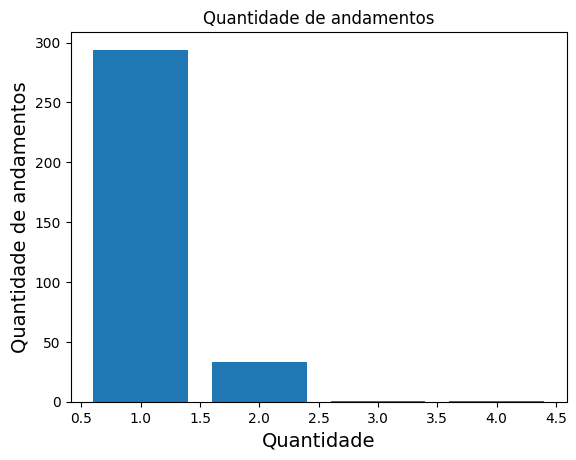

In [26]:
import matplotlib.pyplot as plt

plt.bar(tabela['Link Processo'], tabela['count'])
plt.title('Quantidade de andamentos')
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Quantidade de andamentos', fontsize=14)
#plt.grid(True)

# Add Text watermark
#plt.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#         color ='grey', ha ='right', va ='bottom',
#         alpha = 0.7)


plt.show()

In [27]:
# Processos que possuem andamento de negado seguimento

negado_seg_filter = df_decisao[
                               (df_decisao['Link Processo'].isin(condition_filter['processo'])) &
                               (df_decisao['Subgrupo andamento decisão'] == 'Decisão Final') &
                               (selecao_final['Andamento decisão'] == 'Negado seguimento')
                               ]
#negado_seg_filter = selecao_final[selecao_final['Andamento decisão'] == 'Negado seguimento'].iloc[:,-2]
#negado_seg_filter
#negado_seg_filter['Link Processo']

df_decisao[ (df_decisao['Link Processo'].isin(negado_seg_filter['Link Processo'])) ].head()

,Classe,Número,Link,Relator,Data de autuação,Indicador virtual,Data da decisão,Ano da decisão,Subgrupo andamento decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Indicador eletrônico,Data baixa processo,Ramo direito,Assuntos do processo,Indicador de tramitação,Link Processo,de_para
22679,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,MONOCRÁTICA,2023-02-03,2023,Decisão Final,Negado seguimento,"""[...] 9. Pelo exposto, nego seguimento à pres...",MONOCRÁTICA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22681,Rcl,57762,https://portal.stf.jus.br/processos/detalhe.as...,MIN. CÁRMEN LÚCIA,2023-02-01,MONOCRÁTICA,2023-03-13,2023,Decisão Final,Não conhecido(s),"""[...] 7. Pelo exposto, não conheço do agravo ...",MONOCRÁTICA,Eletrônico,2023-03-10 00:00:00,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...,Não,Rcl-57762,não provido
22700,Rcl,57781,https://portal.stf.jus.br/processos/detalhe.as...,MIN. ROBERTO BARROSO,2023-02-01,MONOCRÁTICA,2023-02-03,2023,Decisão Final,Negado seguimento,2. O presente feito é manifestamente inviável....,MONOCRÁTICA,Eletrônico,2023-03-23 00:00:00,DIREITO DO TRABALHO | DIREITO COLETIVO DO TRAB...,1 - DIREITO DO TRABALHO || DIREITO COLETIVO DO...,Não,Rcl-57781,não provido
22703,Rcl,57783,https://portal.stf.jus.br/processos/detalhe.as...,MIN. GILMAR MENDES,2023-02-02,MONOCRÁTICA,2023-02-03,2023,Decisão Final,Negado seguimento,"em 03.02.2023: ""(...), nego seguimento à recla...",MONOCRÁTICA,Eletrônico,2023-04-18 00:00:00,DIREITO PROCESSUAL CIVIL E DO TRABALHO | PARTE...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...,Não,Rcl-57783,não provido
22710,Rcl,57789,https://portal.stf.jus.br/processos/detalhe.as...,MIN. ALEXANDRE DE MORAES,2023-02-02,MONOCRÁTICA,2023-02-06,2023,Decisão Final,Negado seguimento,"""(...) com base no art. 21, § 1º, do Regimento...",MONOCRÁTICA,Eletrônico,2023-04-16 00:00:00,DIREITO TRIBUTÁRIO | IMPOSTOS | ICMS/ IMPOSTO ...,1 - DIREITO TRIBUTÁRIO || IMPOSTOS || ICMS/ IM...,Não,Rcl-57789,não provido


In [28]:
# Get one example

selection = selecao_final['Link Processo'] == 'Rcl-58059'
selecao_final[selection]

,Classe,Número,Link,Relator,Data de autuação,Indicador virtual,Data da decisão,Ano da decisão,Subgrupo andamento decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Indicador eletrônico,Data baixa processo,Ramo direito,Assuntos do processo,Indicador de tramitação,Link Processo,de_para
23027,Rcl,58059,https://portal.stf.jus.br/processos/detalhe.as...,MIN. GILMAR MENDES,2023-02-22,MONOCRÁTICA,2023-05-24,2023,Decisão Final,Improcedente,-,MONOCRÁTICA,Eletrônico,2023-06-19 00:00:00,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,1 - DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS D...,Não,Rcl-58059,não provido
23028,Rcl,58059,https://portal.stf.jus.br/processos/detalhe.as...,MIN. GILMAR MENDES,2023-02-22,MONOCRÁTICA,2023-05-24,2023,Decisão Final,Negado seguimento,"Ante o exposto, nego seguimento à reclamação e...",MONOCRÁTICA,Eletrônico,2023-06-19 00:00:00,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...,1 - DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS D...,Não,Rcl-58059,não provido


In [29]:
df_decisao['Link Processo'].value_counts()

Rcl-43007    65
Rcl-29303    11
Rcl-53186     8
Rcl-41387     8
Rcl-48660     7
             ..
Rcl-49589     1
Rcl-49590     1
Rcl-49591     1
Rcl-49595     1
Rcl-60740     1
Name: Link Processo, Length: 17188, dtype: int64

In [30]:
df_decisao.columns

Index(['Classe', 'Número', 'Link', 'Relator', 'Data de autuação',
       'Indicador virtual', 'Data da decisão', 'Ano da decisão',
       'Subgrupo andamento decisão', 'Andamento decisão',
       'Observação do andamento', 'Indicador Colegiada',
       'Indicador eletrônico', 'Data baixa processo', 'Ramo direito',
       'Assuntos do processo', 'Indicador de tramitação', 'Link Processo',
       'de_para'],
      dtype='object')

In [31]:
selection = ['Link Processo', 'Classe', 'Data de autuação',
            'Data da decisão', 'Andamento decisão', 'Observação do andamento',
            'Indicador Colegiada', 'Ramo direito', 'Assuntos do processo'
           ]

df_decisao_to_merge = df_decisao[selection]

In [32]:
# Join

df_total = pd.merge(df, df_decisao_to_merge, how='left', on='Link Processo')
df_total.head()

,Link Processo,Número,Relator Atual,Segredo Justiça,Situação Processo,Alertas,Data da Autuação,Partes - Polos Ativos,Partes - Polos Passivos,Indicador Usurpação,...,Controle Difuso,Outros,Classe,Data de autuação,Data da decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Ramo direito,Assuntos do processo
0,Rcl-57762,57762.0,MIN. CÁRMEN LÚCIA,Não,Distribuido,Medida Liminar Criminal,2023-02-01,JEFERSON LUIZ DE SANTANA,JUIZ DE DIREITO DA VARA ÚNICA DA COMARCA DE CA...,Violação,...,None,None,Rcl,2023-02-01,2023-02-03,Negado seguimento,"""[...] 9. Pelo exposto, nego seguimento à pres...",MONOCRÁTICA,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...
1,Rcl-57762,57762.0,MIN. CÁRMEN LÚCIA,Não,Distribuido,Medida Liminar Criminal,2023-02-01,JEFERSON LUIZ DE SANTANA,JUIZ DE DIREITO DA VARA ÚNICA DA COMARCA DE CA...,Violação,...,None,None,Rcl,2023-02-01,2023-03-13,Não conhecido(s),"""[...] 7. Pelo exposto, não conheço do agravo ...",MONOCRÁTICA,DIREITO PROCESSUAL PENAL | PRISÃO PREVENTIVA |...,1 - DIREITO PROCESSUAL PENAL || PRISÃO PREVENT...
2,Rcl-57763,57763.0,MIN. NUNES MARQUES,Não,Distribuido,Medida Liminar,2023-02-01,JOSE FERREIRA CUNHA,TRIBUNAL DE JUSTIÇA DO ESTADO DE SÃO PAULO,Usurpação,...,None,None,Rcl,2023-02-01,2023-02-09,Negado seguimento,-,MONOCRÁTICA,DIREITO PROCESSUAL CIVIL E DO TRABALHO | FORMA...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...
3,Rcl-57764,57764.0,MIN. LUIZ FUX,Não,Distribuido,None,2023-02-01,ESTADO DE MATO GROSSO DO SUL,TRIBUNAL DE JUSTICA DO ESTADO DE MATO GROSSO D...,Violação,...,None,None,Rcl,2023-02-01,2023-03-30,Improcedente,-,MONOCRÁTICA,DIREITO DA SAÚDE | PÚBLICA | TRATAMENTO MÉDICO...,1 - DIREITO DA SAÚDE || PÚBLICA || TRATAMENTO ...
4,Rcl-57765,57765.0,MIN. LUIZ FUX,Não,Distribuido,None,2023-02-01,ESTADO DE MATO GROSSO DO SUL,TRIBUNAL DE JUSTICA DO ESTADO DE MATO GROSSO D...,Violação,...,None,None,Rcl,2023-02-01,2023-03-10,Improcedente,"(...) ""Ex positis, JULGO IMPROCEDENTE a reclam...",MONOCRÁTICA,DIREITO DA SAÚDE | PÚBLICA | TRATAMENTO MÉDICO...,1 - DIREITO DA SAÚDE || PÚBLICA || TRATAMENTO ...


In [33]:
df_total['Indicador Usurpação'].value_counts()

Violação     1397
Usurpação      87
violação       45
                4
Ursupação       1
Name: Indicador Usurpação, dtype: int64

In [34]:
# Quantidade de dados nulos
pd.isnull(df_total['Indicador Usurpação']).value_counts()

False    1534
True      217
Name: Indicador Usurpação, dtype: int64

In [35]:
# df_total[(pd.isnull(df_total['Indicador Usurpação'])) | (df_total['Indicador Usurpação'] == 'Ursupação')]

df_total[pd.isnull(df_total['Indicador Usurpação'])]

,Link Processo,Número,Relator Atual,Segredo Justiça,Situação Processo,Alertas,Data da Autuação,Partes - Polos Ativos,Partes - Polos Passivos,Indicador Usurpação,...,Controle Difuso,Outros,Classe,Data de autuação,Data da decisão,Andamento decisão,Observação do andamento,Indicador Colegiada,Ramo direito,Assuntos do processo
26,Rcl-57787,57787.0,MIN. NUNES MARQUES,Não,Distribuido,Medida Liminar Criminal,2023-02-02,OLAVIO MARINHO AGUIAR,JUIZ FEDERAL DA 12ª VARA FEDERAL DA SEÇÃO JUDI...,None,...,None,None,Rcl,2023-02-02,2023-04-14,Negado seguimento,"""(...)nego seguimento à reclamação.\n\n4. Inti...",MONOCRÁTICA,DIREITO PROCESSUAL PENAL | AÇÃO PENAL,1 - DIREITO PROCESSUAL PENAL || AÇÃO PENAL_x00...
27,Rcl-57788,57788.0,MIN. GILMAR MENDES,Não,Distribuido,Medida Liminar Criminal,2023-02-02,ANA CRISTINA DE ALMEIDA GAIC,RELATOR DO PROCESSO Nº 4000758-20.2022.8.04.90...,None,...,None,None,Rcl,2023-02-02,2023-03-15,Negado seguimento,"""(...) Ante o exposto, nego seguimento à recla...",MONOCRÁTICA,DIREITO PENAL | CRIMES CONTRA A HONRA | CALÚNIA,1 - DIREITO PENAL || CRIMES CONTRA A HONRA || ...
28,Rcl-57789,57789.0,MIN. ALEXANDRE DE MORAES,Não,Distribuido,Medida Liminar,2023-02-02,MERCANTIL NOVA ERA LTDA,ESTADO DO AMAZONAS,None,...,None,None,Rcl,2023-02-02,2023-02-06,Negado seguimento,"""(...) com base no art. 21, § 1º, do Regimento...",MONOCRÁTICA,DIREITO TRIBUTÁRIO | IMPOSTOS | ICMS/ IMPOSTO ...,1 - DIREITO TRIBUTÁRIO || IMPOSTOS || ICMS/ IM...
29,Rcl-57790,57790.0,MIN. ALEXANDRE DE MORAES,Não,Distribuido,Medida Liminar,2023-02-02,RODRIGO HENRIQUE FITIPALDI DE MELO,JUIZ DO TRABALHO DA 85ª VARA DO TRABALHO DE SÃ...,None,...,None,None,Rcl,2023-02-02,2023-02-03,Procedente,"""(...) com base no art. 161, parágrafo único, ...",MONOCRÁTICA,DIREITO PROCESSUAL CIVIL E DO TRABALHO | PARTE...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...
30,Rcl-57791,57791.0,MIN. CÁRMEN LÚCIA,Não,Distribuido,Medida Liminar,2023-02-02,INDÚSTRIAS NUCLEARES DO BRASIL S/A - INB,TRIBUNAL SUPERIOR DO TRABALHO,None,...,None,None,Rcl,2023-02-02,2023-02-22,Procedente,Não se pode admitir a transferência para a Adm...,MONOCRÁTICA,DIREITO DO TRABALHO | DIREITO INDIVIDUAL DO TR...,1 - DIREITO DO TRABALHO || DIREITO INDIVIDUAL ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Rcl-58884,58884.0,MIN. ANDRÉ MENDONÇA,Não,Distribuido,Medida Liminar Criminal,2023-04-03,RAIMUNDO JOSE DOS REIS FILHO,"JUIZ DE DIREITO GUSTAVO MOREIRA,TRIBUNAL DE JU...",None,...,None,Outros,Rcl,2023-04-03,2023-07-02,Negado seguimento,"Ante o exposto, nego seguimento à Reclamação, ...",MONOCRÁTICA,DIREITO PROCESSUAL CIVIL E DO TRABALHO,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO
1700,Rcl-58858,58858.0,MIN. GILMAR MENDES,Não,Distribuido,Medida Liminar Idade,2023-04-03,SUZETE CANDIA SILVEIRA,SEGUNDA TURMA RECURSAL DA SEÇÃO JUDICIÁRIA DE ...,None,...,None,Outros,Rcl,2023-04-03,2023-04-10,Negado seguimento,"Em 03/04/2023. ""(...) nego seguimento à reclam...",MONOCRÁTICA,DIREITO PREVIDENCIÁRIO | BENEFÍCIOS EM ESPÉCIE...,1 - DIREITO PREVIDENCIÁRIO || BENEFÍCIOS EM ES...
1707,Rcl-59383,59383.0,MIN. ANDRÉ MENDONÇA,Não,Distribuido,Medida Liminar,2023-04-25,TIM SA,TRIBUNAL REGIONAL DO TRABALHO DA 15ª REGIÃO,None,...,None,None,Rcl,2023-04-25,2023-06-19,Liminar deferida,"(...) 19.\tAnte o exposto, resguardado o reexa...",MONOCRÁTICA,DIREITO PROCESSUAL CIVIL E DO TRABALHO | JURIS...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...
1748,Rcl-59406,59406.0,MIN. ROBERTO BARROSO,Sim,Distribuido,Medida Liminar,2023-04-26,None,None,None,...,None,Segredo de justiça.,Rcl,2023-04-26,2023-05-18,Negado seguimento,"(...)\n12. Diante do exposto, com base no art....",MONOCRÁTICA,DIREITO PROCESSUAL CIVIL E DO TRABALHO | LIQUI...,1 - DIREITO PROCESSUAL CIVIL E DO TRABALHO || ...


In [36]:
df_total['Andamento decisão'].value_counts()

Negado seguimento                 808
Procedente                        490
Procedente em parte                55
Improcedente                       45
Extinto o processo                 38
Prejudicado                        33
Homologada a desistência           22
Não conhecido(s)                    9
Liminar deferida                    7
Não provido                         6
Decisão (segredo de justiça)        4
Provido em parte                    4
Provido                             3
Determinado arquivamento            3
Concedida a ordem de ofício         2
Deferido                            2
Decisão Referendada                 2
Deferido em parte                   1
Denegada a ordem                    1
Indeferido                          1
Liminar indeferida                  1
Liminar deferida ad referendum      1
Name: Andamento decisão, dtype: int64

In [37]:
# pivot = df_total.pivot_table(index=['Indicador Usurpação'], values=['sales'], aggfunc='sum')


In [38]:
pd.crosstab(index=df_total['Indicador Usurpação'], columns=df_total['Andamento decisão'])

Andamento decisão,Concedida a ordem de ofício,Decisão (segredo de justiça),Decisão Referendada,Deferido,Deferido em parte,Denegada a ordem,Determinado arquivamento,Extinto o processo,Homologada a desistência,Improcedente,...,Liminar deferida ad referendum,Liminar indeferida,Negado seguimento,Não conhecido(s),Não provido,Prejudicado,Procedente,Procedente em parte,Provido,Provido em parte
Indicador Usurpação,,,,,,,,,,,,,,,,,,,,,
Ursupação,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Usurpação,0,0,0,0,0,0,0,3,0,4,...,0,0,49,1,0,0,13,4,0,2
Violação,2,3,2,2,1,1,3,27,18,33,...,1,1,631,7,4,27,400,47,2,2
violação,0,0,0,0,0,0,0,1,2,0,...,0,0,23,0,1,3,9,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
